# Import libraries

In [ ]:
#handling manipulation of data to get size of images and count them
import pandas as pd
import numpy as np
#handling showing images 
import matplotlib.pyplot as plt
%matplotlib inline
#handling folders and help in read and remove folders
import os
#handling pathes of folders and return content of specific pathes
import glob as gb
#handling images and resizing 
import cv2
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

# Pathes

In [5]:
covid  = '//kaggle//input//covid19-radiography-database//COVID-19_Radiography_Dataset//COVID//'
normal = '//kaggle//input//covid19-radiography-database//COVID-19_Radiography_Dataset/Normal//'
Lung_Opacity = '//kaggle//input//covid19-radiography-database//COVID-19_Radiography_Dataset//Lung_Opacity//'
Viral_Pneumonia = '//kaggle//input//covid19-radiography-database//COVID-19_Radiography_Dataset//Viral Pneumonia//'

# Length of images in each folder

In [6]:
files = gb.glob(pathname= str(covid +'images/*.png'))
print(f'For covid data , found {len(files)}')

For covid data , found 3616


In [9]:
files = gb.glob(pathname= str(normal +'images/*.png'))
print(f'For normal data , found {len(files)}')

For normal data , found 10192


In [11]:
files = gb.glob(pathname= str(Lung_Opacity +'images/*.png'))
print(f'For normal data , found {len(files)}')

For normal data , found 6012


In [13]:
files = gb.glob(pathname= str(Viral_Pneumonia +'images/*.png'))
print(f'For normal data , found {len(files)}')

For normal data , found 1345


# Dictionary of all exist classes and its numberic values in used in dataset 

In [14]:
code = {'Normal':0 ,'COVID':1 , 'Lung_Opacity':2 ,'Viral Pneumonia':3}
#used for getting name of class x  using its number n or y
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x   

# Shape of the images

In [15]:
size = []
files = gb.glob(pathname= str(covid +'images/*.png'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(299, 299)    3616
dtype: int64

In [16]:
size = []
files = gb.glob(pathname= str(normal +'images/*.png'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(299, 299)    10192
dtype: int64

In [17]:
size = []
files = gb.glob(pathname= str(Lung_Opacity +'images/*.png'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(299, 299)    6012
dtype: int64

In [18]:
size = []
files = gb.glob(pathname= str(Viral_Pneumonia +'images/*.png'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(299, 299)       1205
(299, 299, 3)     140
dtype: int64

In [19]:
s=100

In [20]:
trainpath = '/kaggle/input/covid19-radiography-database/COVID-19_Radiography_Dataset/'
for folder in  os.listdir(trainpath ):
    print(folder)

Lung_Opacity.metadata.xlsx
Normal.metadata.xlsx
README.md.txt
COVID.metadata.xlsx
Normal
Lung_Opacity
Viral Pneumonia.metadata.xlsx
Viral Pneumonia
COVID


In [21]:
#empty list to contain images itself called featues for the CNN model  
X_train = []
#empty list to contain actual value for each image
y_train = []

for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath  + folder + '//images/*.png'))
    for file in files: 
        image = cv2.imread(file)
        #using cv2.resize without determine interpolation make it preserve aspect ratio for each image 
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [22]:
print(f'we have {len(X_train)} items in X_train')

we have 21165 items in X_train


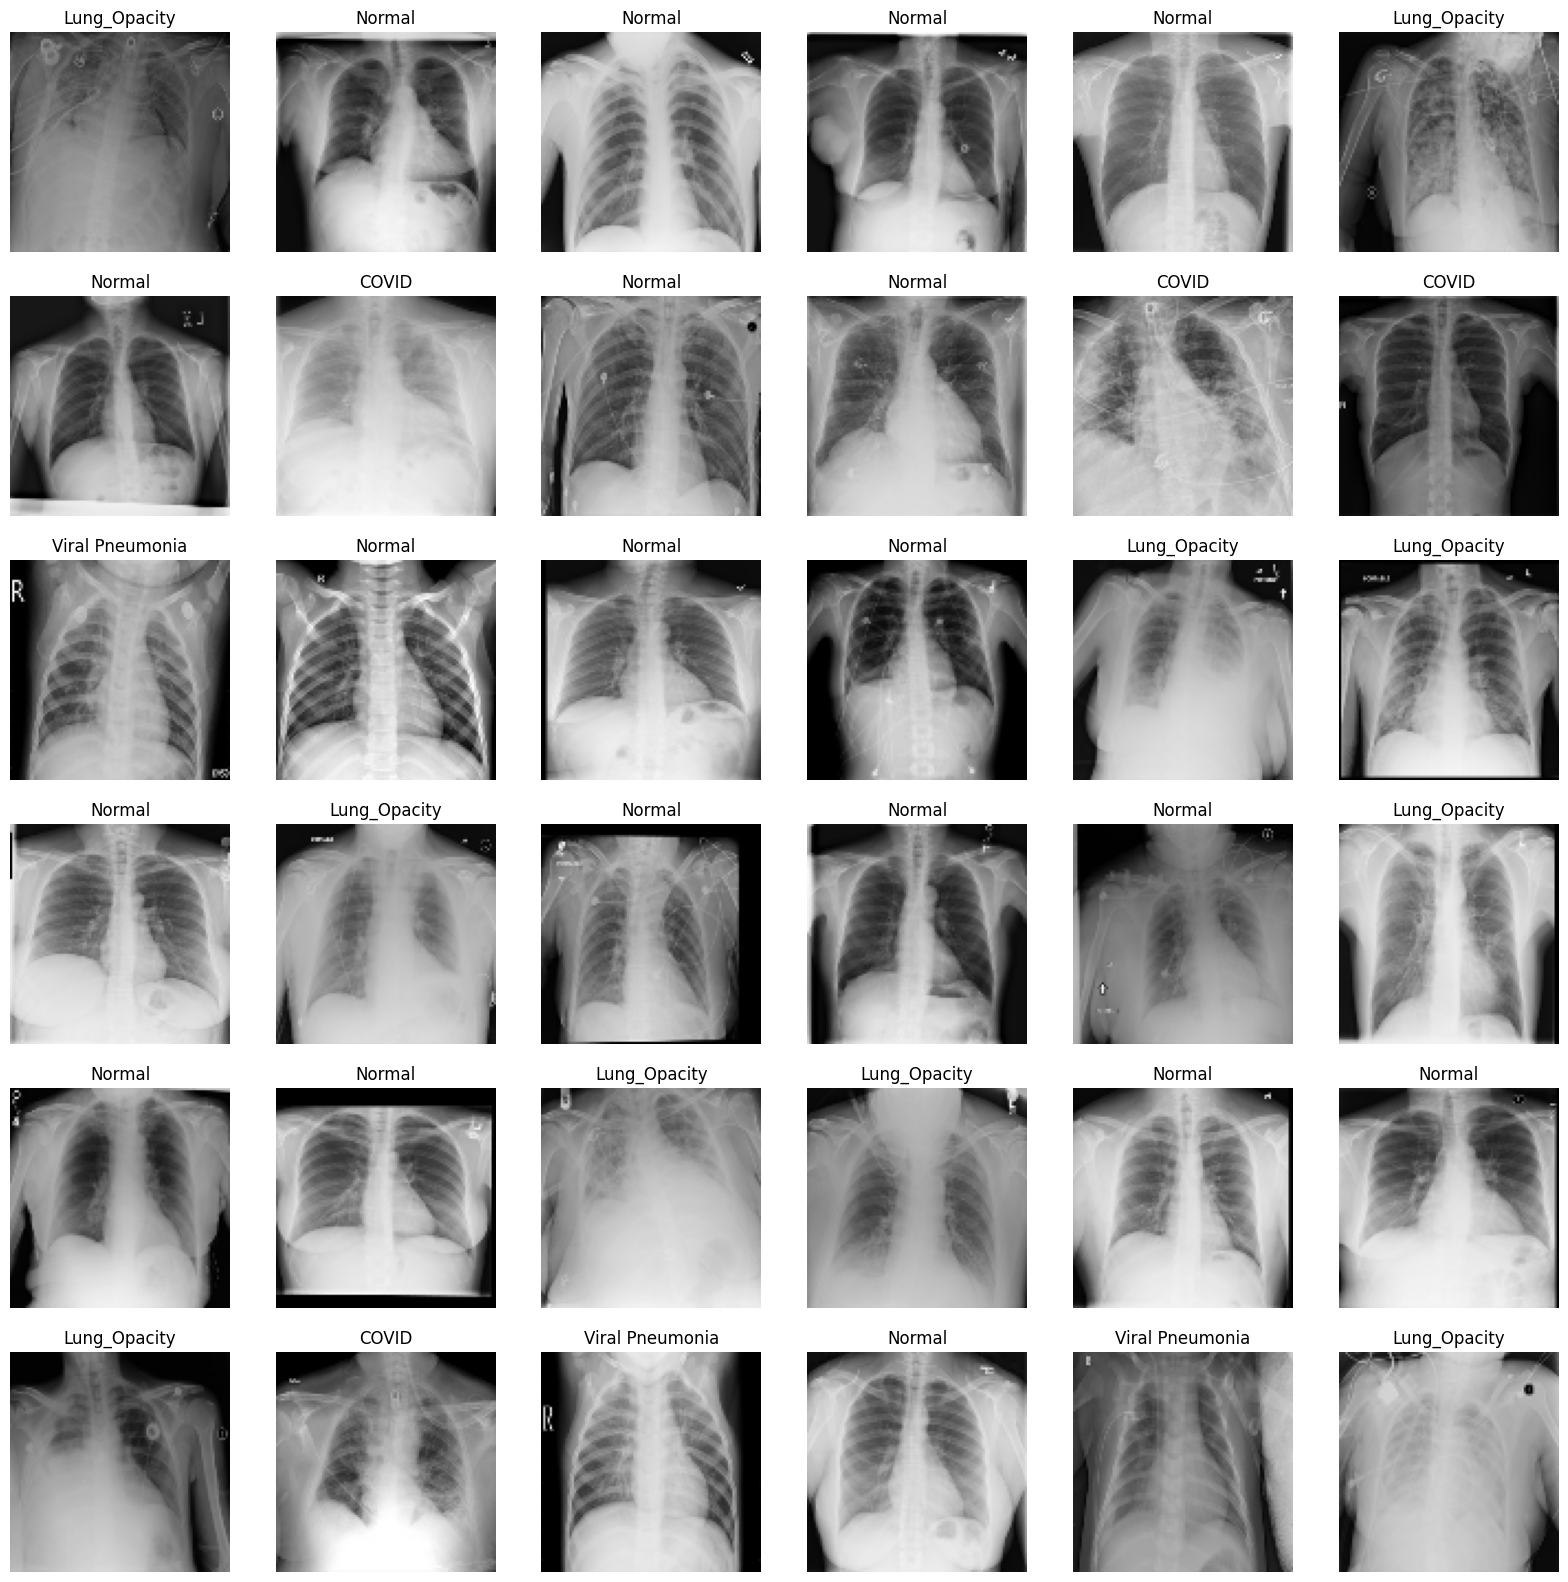

In [23]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [24]:
from sklearn.model_selection import train_test_split
data, test_data , label , test_label = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
train_data, pred_data , train_label , pred_label = train_test_split(data, label, test_size=0.1, random_state=42)

In [42]:
len(train_data)

15238

In [27]:
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)
pred_data = np.array(pred_data)
pred_label = np.array(pred_label)
    
print(f'Train_data shape  is {train_data.shape}')
print(f'Train_label shape  is {train_label.shape}')

print(f'test_data shape  is {test_data.shape}')
print(f'test_label shape  is {test_label.shape}')

print(f'pred_data shape  is {pred_data.shape}')
print(f'pred_label shape  is {pred_label.shape}')

Train_data shape  is (15238, 100, 100, 3)
Train_label shape  is (15238,)
test_data shape  is (4233, 100, 100, 3)
test_label shape  is (4233,)
pred_data shape  is (1694, 100, 100, 3)
pred_label shape  is (1694,)


In [28]:
print(train_label[:100])

[1 1 1 0 0 0 0 0 2 0 0 2 0 0 3 2 3 0 1 0 3 2 0 2 1 1 2 1 1 0 0 2 0 1 2 1 2
 1 3 2 0 2 1 0 2 2 0 0 0 0 1 2 2 0 2 0 1 0 0 2 3 0 2 0 3 0 2 0 0 0 2 1 1 0
 0 0 2 2 0 0 1 2 0 2 2 0 2 0 2 1 2 0 0 2 2 0 0 1 0 0]


In [29]:
model = keras.models.Sequential([
keras.layers.Conv2D(300 , kernel_size = (3 , 3) , activation="relu" , input_shape=(s, s , 3)) ,
keras.layers.Conv2D(300 , kernel_size = (3 , 3) , activation="relu") ,
keras.layers.Conv2D(250 , kernel_size = (3 , 3) , activation="relu") ,
keras.layers.MaxPool2D(6 , 6) ,
keras.layers.Conv2D(200 ,kernel_size = (3 , 3), activation="relu") ,
keras.layers.Conv2D(100 ,kernel_size = (3 , 3), activation="relu") ,
keras.layers.Conv2D(80 , kernel_size = (3 , 3) , activation="relu") ,
keras.layers.MaxPool2D(6 , 6) ,
keras.layers.Flatten() ,
keras.layers.Dense(256 , activation="relu") ,
keras.layers.Dense(128 , activation="relu") ,
keras.layers.Dense(128 , activation="relu") ,
keras.layers.Dropout(rate=0.3) ,
keras.layers.Dense(4 , activation="softmax") ,
])

In [30]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Model Details are : ')
print(model.summary())

In [32]:
epochs = 25
model.fit(train_data, train_label, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/25
239/239 [==============================] - 179s 629ms/step - loss: 1.0814 - accuracy: 0.6017
Epoch 2/25
239/239 [==============================] - 153s 641ms/step - loss: 0.7682 - accuracy: 0.6962
Epoch 3/25
239/239 [==============================] - 153s 640ms/step - loss: 0.7223 - accuracy: 0.7104
Epoch 4/25
239/239 [==============================] - 153s 639ms/step - loss: 0.6379 - accuracy: 0.7468
Epoch 5/25
239/239 [==============================] - 153s 639ms/step - loss: 0.5799 - accuracy: 0.7740
Epoch 6/25
239/239 [==============================] - 153s 638ms/step - loss: 0.5180 - accuracy: 0.7971
Epoch 7/25
239/239 [==============================] - 152s 638ms/step - loss: 0.4972 - accuracy: 0.8086
Epoch 8/25
239/239 [==============================] - 153s 638ms/step - loss: 0.4544 - accuracy: 0.8269
Epoch 9/25
239/239 [==============================] - 153s 639ms/step - loss: 0.4222 - accuracy: 0.8415
Epoch 10/25
239/239 [==============================] - 153s 638m

In [33]:
ModelLoss, ModelAccuracy = model.evaluate(test_data, test_label)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

133/133 [==============================] - 21s 103ms/step - loss: 0.4685 - accuracy: 0.8476
Test Loss is 0.4684763550758362
Test Accuracy is 0.8476257920265198


In [35]:
y_result = model.predict(pred_data)
print('prediction shape is {}'.format(y_result.shape))

53/53 [==============================] - 4s 82ms/step
prediction shape is (1694, 4)


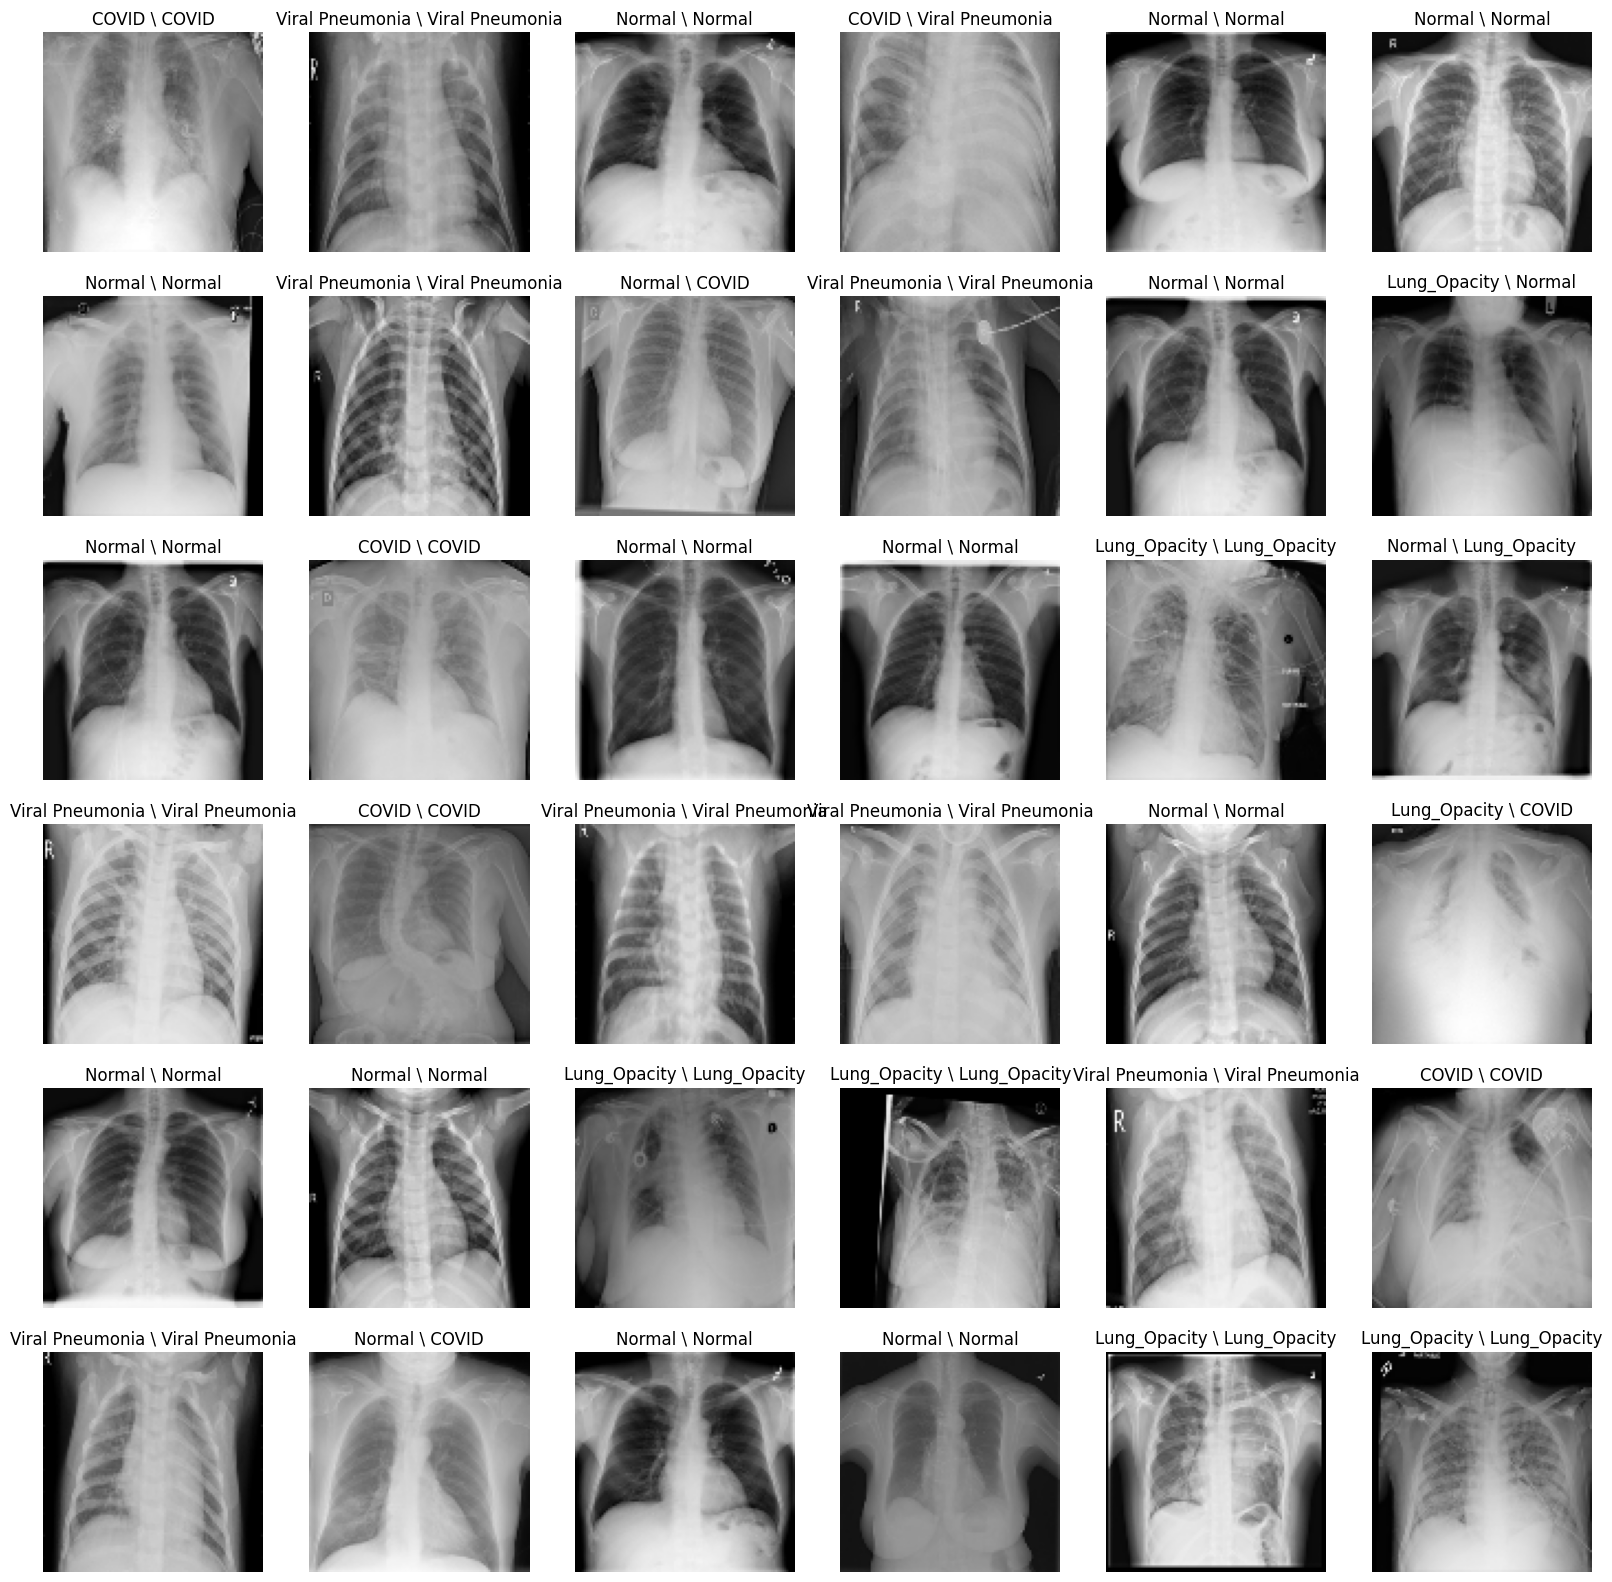

In [37]:
plt.figure(figsize=(20,20))
for n ,i in enumerate(list(np.random.randint(0,len(pred_data),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(pred_data[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])) +' \ '+ getcode(pred_label[i]))

In [38]:
model.save('covid_detection_model.sav')